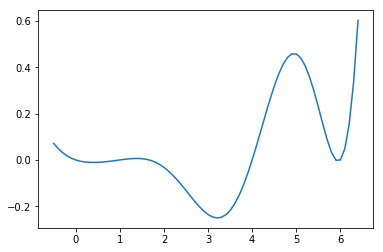

In [10]:
# Hyper hyper parameter optimization
# using stanbdard libraries TPE
# based on hyperopt
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial that is pretty pretty
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100]) 
    g = np.poly1d([1, 6, 4, 8, 16, 32, 64, 0], True)
    f = f * g
    #
    # Inserthere your CV function ti make it more complicated 
    # e.g., score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    #
    return f(x)*1e-10

    
x = np.arange(-0.5,6.5,0.1) # plot it
y = objective(x)
plt.plot(x,y)
plt.show()

In [4]:
from hyperopt import hp
# Create the domain space
space = hp.loguniform('x', 1, math.log(6.0)) # log-uniform
#space = hp.uniform('x', -1, 5) #linear uniform

from hyperopt import tpe # Use TPE (lookup other methods, see slides, or skikit description)
tpe_algo = tpe.suggest

from hyperopt import Trials # Create a MCMC sample process
tpe_trials = Trials()

In [13]:
from hyperopt import fmin

# Run evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, 
                algo=tpe_algo, trials=tpe_trials, 
                max_evals=500) #number of evaluations ---> main CPU 

print(tpe_best)

0it [00:00, ?it/s, best loss: ?]
{'x': 3.213349279792613}


(array([22., 20., 22., 25., 27., 32., 33., 42., 29., 30., 29., 22., 19.,
        19., 16., 13., 10., 10.,  7.,  7.,  4.,  6.,  2.,  6.,  2.,  2.,
         5.,  1.,  2.,  3.,  1.,  2.,  1.,  2.,  1.,  3.,  1.,  2.,  2.,
         1.,  3.,  1.,  1.,  1.,  2.,  1.,  3.,  2.,  1.,  2.]),
 array([2.71885088, 2.78358746, 2.84832405, 2.91306064, 2.97779722,
        3.04253381, 3.1072704 , 3.17200698, 3.23674357, 3.30148016,
        3.36621675, 3.43095333, 3.49568992, 3.56042651, 3.62516309,
        3.68989968, 3.75463627, 3.81937285, 3.88410944, 3.94884603,
        4.01358261, 4.0783192 , 4.14305579, 4.20779238, 4.27252896,
        4.33726555, 4.40200214, 4.46673872, 4.53147531, 4.5962119 ,
        4.66094848, 4.72568507, 4.79042166, 4.85515825, 4.91989483,
        4.98463142, 5.04936801, 5.11410459, 5.17884118, 5.24357777,
        5.30831435, 5.37305094, 5.43778753, 5.50252411, 5.5672607 ,
        5.63199729, 5.69673388, 5.76147046, 5.82620705, 5.89094364,
        5.95568022]),
 <a list of 50

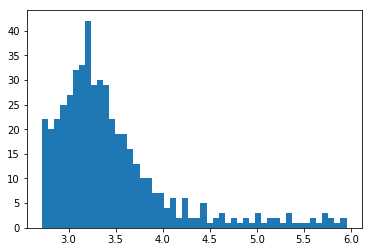

In [4]:
# Press results into a dataframe (if wanted)
# tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 
#                            'iteration': tpe_trials.idxs_vals[0]['x'],
#                            'x': tpe_trials.idxs_vals[1]['x']})                          
#tpe_results.head

#Plot histogram of TPE trials, to see MCMC importance sampling 
data = tpe_trials.idxs_vals[1]['x']
plt.hist(data, 50)